In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
Data=pd.read_csv('train.csv')
Validation_data=pd.read_csv('test.csv')

In [22]:
Data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Validation_data.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
features=Data.drop('label',axis=1)
label=Data['label']

In [24]:
features.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
label.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(features,label)

In [27]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(31500, 784)
(10500, 784)
(31500,)
(10500,)


In [35]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(C=20,multi_class='multinomial',solver='lbfgs', fit_intercept=False,n_jobs=-1)

In [36]:
reg.fit(X,y)

LogisticRegression(C=20, fit_intercept=False, multi_class='multinomial',
                   n_jobs=-1)

In [37]:
y_predict=reg.predict(X)
y_test_predict=reg.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print("accuracy_score on X: ",accuracy_score(y,y_predict)  )
print("accuracy_score on X_test: ",accuracy_score(y_test,y_test_predict)  )

accuracy_score on X:  0.9417142857142857
accuracy_score on X_test:  0.913047619047619


In [47]:
def print_pixels(Data,n):
    first_five=Data.iloc[:n]
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    for i, ax in enumerate(axes):
        # The label is in the first column
        label = first_five.iloc[i, 0]
        # The remaining columns are the pixel values
        pixels = first_five.iloc[i, 1:].values
        # Reshape the pixel values to a 28x28 array
        image = pixels.reshape(28, 28)
        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Digit: {label}')
        ax.axis('off')

    plt.show()

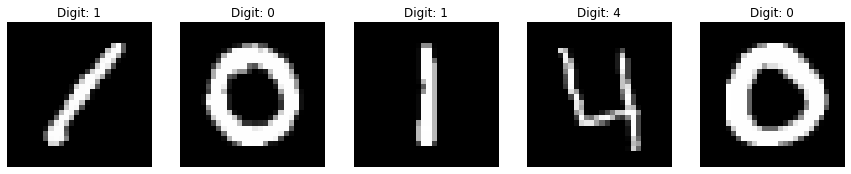

In [49]:
print_pixels(Data,5)